In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-multiflow/scikit-multiflow to /tmp/pip-req-build-5hq2e_4v
  Running command git clone -q https://github.com/scikit-multiflow/scikit-multiflow /tmp/pip-req-build-5hq2e_4v
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.6.dev0-cp38-cp38-linux_x86_64.whl size=1062938 sha256=efd1fb9c9220905f544b100e788bbb11be2b96adbd7f48b15397e61282784105
  Stored in directory: /tmp/pip-ephem-wheel-cache-qhi75maj/wheels/ca/a6/41/1ea37509e8f4efbcbe69b599a2386a58fec66d1f4aa087a5d1
Successfully built scikit-multiflow


In [5]:
import os
import filecmp
import difflib
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [6]:
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier

In [7]:
from scipy.io import arff
import pandas as pd
import numpy as np
Insects_abrupts_normDS = arff.loadarff(open("/content/drive/MyDrive/INSECTS-abrupt_balanced_norm.arff")) 
Insects_gradual_balanced_normDS = arff.loadarff(open("/content/drive/MyDrive/INSECTS-gradual_balanced_norm.arff")) 
Insects_incremental_balanced_normDS = arff.loadarff(open("/content/drive/MyDrive/INSECTS-incremental_balanced_norm.arff")) 


In [10]:
def labelEncoder(y):  
  # creating instance of labelencoder
  labelencoder = LabelEncoder()
  # Assigning numerical values and storing in another column
  y = labelencoder.fit_transform(y)
  y

In [13]:
df_abrupt = pd.DataFrame(Insects_abrupts_normDS[0])
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() # converting categorical variables to numerical variables 
df_abrupt.value_counts()
df_abrupt.iloc[:,-1] = labelencoder.fit_transform(df_abrupt.iloc[:,-1])
df_abrupt_X = df_abrupt[df_abrupt.columns[~df_abrupt.columns.isin(['class'])]]
df_abrupt_y = df_abrupt['class']
df_abrupt.head(20)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,2
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,2
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,4
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,2
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,1
5,0.290048,0.376655,0.265364,0.002345,0.349787,0.038561,0.328375,0.029967,0.062300,0.024937,...,0.012356,0.006035,0.010194,0.007669,0.004474,0.021949,0.013376,0.005545,0.007543,5
6,0.703354,0.212933,0.007386,0.309714,0.404653,0.514641,0.484001,0.024265,0.023083,0.054168,...,0.160476,0.040955,0.020071,0.013698,0.007914,0.008780,0.016182,0.012371,0.011991,5
7,0.607511,0.036580,0.088694,0.269505,0.345496,0.142084,0.282492,0.082534,0.079843,0.062985,...,0.021879,0.018122,0.025777,0.014497,0.016348,0.033121,0.029755,0.023333,0.024415,5
8,0.189449,0.239862,0.171706,0.236359,0.006908,0.033678,0.188917,0.440615,0.433644,0.179348,...,0.050120,0.056057,0.152886,0.173487,0.097170,0.049500,0.035956,0.054770,0.046489,4
9,0.550076,0.166653,0.242406,0.325101,0.011737,0.400244,0.360612,0.029147,0.107035,0.052710,...,0.019483,0.008992,0.019086,0.045053,0.013308,0.015123,0.009213,0.008663,0.019564,0


In [14]:
df_gradual = pd.DataFrame(Insects_gradual_balanced_normDS[0])
#df_gradual.head(2)
labelencoder = LabelEncoder() # converting categorical variables to numerical variables 
df_gradual.value_counts
df_gradual.iloc[:,-1] = labelencoder.fit_transform(df_gradual.iloc[:,-1])
df_gradual_X = df_gradual[df_gradual.columns[~df_gradual.columns.isin(['class'])]]
df_gradual_y = df_gradual['class'] 
df_gradual.head(20)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.221687,0.278738,0.230267,0.012072,0.291936,0.368676,0.306643,0.148194,0.373911,0.239031,...,0.031280,0.117695,0.086213,0.051817,0.032058,0.024235,0.057984,0.084282,0.246349,0
1,0.216156,0.248490,0.207935,0.277610,0.012118,0.022270,0.215332,0.034307,0.032627,0.038244,...,0.011887,0.006941,0.005115,0.004826,0.006064,0.024626,0.088533,0.052340,0.025880,0
2,0.458254,0.011934,0.290734,0.228966,0.108324,0.422456,0.334562,0.075886,0.055659,0.032657,...,0.014689,0.043372,0.038154,0.019074,0.013496,0.023259,0.085427,0.143533,0.107721,1
3,0.399140,0.452438,0.375610,0.500829,0.002449,0.606104,0.563900,0.011115,0.007772,0.005426,...,0.002710,0.011455,0.037303,0.308902,0.297547,0.099780,0.020431,0.005512,0.006190,1
4,0.418305,0.479065,0.397929,0.000868,0.511484,0.643908,0.604099,0.015001,0.007669,0.003962,...,0.003295,0.006972,0.010259,0.031866,0.212833,0.203114,0.100263,0.019290,0.012371,1
5,0.877451,0.238857,0.408725,0.544405,0.001275,0.660248,0.622925,0.006194,0.002675,0.001776,...,0.000994,0.002951,0.003074,0.005315,0.035631,0.236923,0.118051,0.030521,0.011892,1
6,0.750726,0.206981,0.352072,0.466525,0.001544,0.682089,0.617369,0.014701,0.009676,0.009870,...,0.006923,0.106566,0.173294,0.053397,0.022885,0.007879,0.004325,0.004330,0.010166,1
7,0.218784,0.254738,0.208921,0.011327,0.274444,0.341384,0.277732,0.031290,0.034295,0.054077,...,0.012341,0.009233,0.008626,0.006272,0.008156,0.014726,0.049408,0.046876,0.032371,4
8,0.440241,0.508271,0.419378,0.556412,0.006738,0.680973,0.638070,0.009492,0.006704,0.005105,...,0.004259,0.007199,0.005422,0.008150,0.026288,0.110937,0.287894,0.103499,0.042327,1
9,0.404780,0.471751,0.007462,0.389948,0.043823,0.503316,0.477275,0.048813,0.033576,0.022049,...,0.003828,0.010220,0.016336,0.080985,0.233147,0.147957,0.058006,0.018627,0.012427,1


In [15]:
df_incremental = pd.DataFrame(Insects_incremental_balanced_normDS[0])
#df_incremental.head(2)
df_incremental.value_counts
df_incremental.iloc[:,-1] = labelencoder.fit_transform(df_incremental.iloc[:,-1])
df_incremental_X = df_incremental[df_incremental.columns[~df_incremental.columns.isin(['class'])]]
df_incremental_y = df_incremental['class']  
df_incremental.head(20)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.162919,0.223581,0.170982,0.210447,0.260262,0.313684,0.210527,0.129912,0.108045,0.314143,...,0.184005,0.107587,0.029085,0.019693,0.005861,0.024745,0.012178,0.007580,0.006055,2
1,0.179910,0.015617,0.018342,0.111462,0.028435,0.164292,0.105495,0.085920,0.079683,0.048566,...,0.008929,0.016024,0.024117,0.021911,0.010983,0.010770,0.010413,0.009680,0.007052,2
2,0.093009,0.171964,0.103600,0.193611,0.206219,0.260224,0.183089,0.275424,0.240193,0.236459,...,0.030383,0.024538,0.023142,0.027263,0.019545,0.021473,0.022304,0.016444,0.013020,5
3,0.364570,0.120045,0.186800,0.226773,0.280583,0.335924,0.229092,0.217283,0.212943,0.101705,...,0.032920,0.181381,0.292963,0.176154,0.028934,0.014860,0.024450,0.061111,0.008718,2
4,0.257008,0.353529,0.007418,0.330596,0.027673,0.239377,0.283919,0.036563,0.088543,0.056334,...,0.007628,0.009555,0.005842,0.019820,0.006230,0.005064,0.009392,0.007614,0.005202,1
5,0.239869,0.337294,0.249217,0.303225,0.374503,0.005844,0.320719,0.019218,0.202240,0.318037,...,0.005712,0.034437,0.051805,0.010741,0.021360,0.012610,0.006999,0.017092,0.084628,5
6,0.253541,0.341122,0.013504,0.232372,0.238098,0.309545,0.243247,0.060388,0.216650,0.211541,...,0.017178,0.013323,0.024316,0.028284,0.015150,0.020651,0.018278,0.021657,0.025996,1
7,0.598419,0.193648,0.403966,0.270318,0.006548,0.033697,0.322716,0.015193,0.025199,0.015092,...,0.006337,0.004481,0.004666,0.026853,0.003059,0.015574,0.016040,0.005184,0.005088,1
8,0.236756,0.329274,0.248056,0.302829,0.373237,0.006564,0.319913,0.009510,0.058879,0.108879,...,0.005399,0.031561,0.029120,0.007523,0.005997,0.005335,0.006541,0.010999,0.041411,1
9,0.275695,0.088176,0.140074,0.172846,0.212951,0.299585,0.195149,0.077702,0.104999,0.057150,...,0.008761,0.014743,0.004911,0.004532,0.027272,0.069348,0.040042,0.010357,0.005345,4


In [16]:
def slidingWindow(dataSeq , windowSize , accuracy_list = []):
    #print(dataSeq.value_counts)
    for i in range(len(dataSeq) - windowSize + 1):           
          dataset = dataSeq[i: i + windowSize]
          majClass = dataset['class'].mode()
          accuracy = EvaluatePrequentialAccuracy(dataset ,  majClass)
          print(accuracy)
          np.append(accuracy_list , [windowSize , round(accuracy,3)])          
#slidingWindow(df_gradual_X, 1)

In [17]:
def EvaluatePrequentialAccuracy(dataset , MajClass):  
  #print(dataset.value_counts)
  accurate = 0
  notaccurate = 0
  for index, row in dataset.iterrows():      
      if row['class'].astype(int) == MajClass:
             accurate += 1
      else:
             notaccurate  += 1    
  accuracy = accurate/1000
  return accuracy         

In [18]:
acc = 0
nacc = 0
predicted = 0
# warm up - output is the list of majority class in list eg : [100 , 20 ,3 , 23 , 56 , 89] where  the 5 elemets are counts of classs
majClassArray = [0,0,0,0,0,0]
windowSize = 1000
dataset_1 = df_abrupt.iloc[0 : windowSize]
for datapoint in dataset_1['class']: 
  i = 0
  for i in range(6): 
    if datapoint == i:
      majClassArray[i] += 1  

print(majClassArray)      
#predicted += 1

[193, 193, 211, 40, 181, 182]


In [19]:
def GetMajorityClassforWindow(dataframe,isBaseline = False):
  majClassArray = [0,0,0,0,0,0]
  #majClassArrayBaseline = [0 , 0 , 0 , 0 , 0 , 0]
  windowSize = 1000
  #dataset_1 = dataframe.iloc[0 : windowSize]
  for datapoint in dataframe['class']: 
    i = 0
    for i in range(6): 
      if datapoint == i:
        majClassArray[i] += 1  
   
  #if isBaseline:
      #majClassArrayBaseline =  majClassArray 

  ##print('Baseline \n')     
  #print(majClassArrayBaseline)     
  return majClassArray

In [20]:
def CalculateAccuracy(dataset , majClassArray):
  import operator
  acc = 0
  nacc = 0
  predicted = 1
  #print('\n Loop - Start')
  for index, row in dataset.iterrows():  
     # for every sample get the class and check with the maj class array and predict (update accuracy) 
     # if Maj class and y is same update accuracy else update the maj class   
     max_value = max(majClassArray)
     index_value = [index for index in range(len(majClassArray)) if majClassArray[index] == max_value]
     #if len(index_value) > 1 and len(majClassArrayBaseline) > 1:
       # check the baseline for the majority class
          #getMajClass = max(majClassArrayBaseline)
     #else:  
      #print(index_value[0])
     getMajClass = index_value[0]
     if row['class'].astype(int) == getMajClass:          
         acc += 1
     else: 
        indexToTrain = row['class'].astype(int)
        # updat the majclassArray 
        majClassArray[indexToTrain] += 1
        nacc += 1
  #print('\n Acc -' + str(acc))
  accuracyforthisPreqWindow =  acc / 1000  
 
  #print('\n No Acc -' + str(nacc))
  #accuracyforthisPreqWindow =  acc / 1000

  #print('\n Loop - End')
  return accuracyforthisPreqWindow
  # for a window , get 1000 samples and get the accuracy 

In [25]:
def majorityClass_Classifier(dataframe):  
    majClassArrayBaseline = [0 , 0 , 0 , 0 , 0 , 0]
    accuracy_list = [] 
    windowSize = 1000
    # Baseline train 1000
    data = dataframe.iloc[0 : windowSize]
    majClassArrayBaseline = GetMajorityClassforWindow(data, True)    
    #print(majorityClassArrayforWindow[2])
    acu_baslin = CalculateAccuracy( data , majClassArrayBaseline)
    accuracy_list.append([windowSize, round(acu_baslin,5)])    # 1000  / get baslin majority class / get accuracy for 1000  
    #print(majClassArrayBaseline)

    # test first 1000    
    dataset_1 = dataframe.iloc[windowSize : windowSize + 1000]    
    majClass =  majClassArrayBaseline    
    accuracy = CalculateAccuracy(dataset_1 , majClass)  
    #print( 'Here' + str(accuracy))   
    accuracy_list.append([windowSize + 1000, round(accuracy,5)])   # 1000 - 2000 test / get accuracy for 1000  

     
    # Base model and Train set ready with majority class
    # Now give the sliding window and predict and calculate accuracy     
    # accuracy_list = slidingWindow(dataframe.iloc[windowSize +1: ], 1 , accuracy_list)  
    windowSize = windowSize + 1000 # Start from 2000 to complte ds
    frameSize = len(dataframe)
    dataSeq = dataframe.iloc[windowSize: frameSize ]  
    Size = 1000
    
    #print(range(len(dataSeq) -  Size + 1))
    for i in range(len(dataSeq) -  Size + 1):           
       dataset = dataSeq[i : i +  Size]       
       accuracy = CalculateAccuracy(dataset , majClass)       
       windowSize += 1 
       accuracy_list.append([int(windowSize) , round(accuracy,3)])          
       majClass =  GetMajorityClassforWindow(dataset, False)
       #slidingWindow(df_gradual_X, 1)
    #print(len(dataframe))
    return accuracy_list

In [45]:
accuracy_list_abrupt = majorityClass_Classifier(df_abrupt)
accuracy_list_abrupt

accuracy_list_gradual = majorityClass_Classifier(df_gradual)
accuracy_list_gradual

accuracy_list_incremental = majorityClass_Classifier(df_incremental)
accuracy_list_incremental

KeyboardInterrupt: ignored

In [36]:
import csv
# field names 
fields = ['Window', 'Accuracy'] 

with open('//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//abrupt_majClass_accuracies.csv' , 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(accuracy_Noclass_list_abrupt)

with open('//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//gradual_majClass_accuracies.csv' , 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(accuracy_Noclass_list_gradual)

with open('//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//incremental_majClass_accuracies.csv' , 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(accuracy_list_incremental)

Text(0, 0.5, 'Accuracy')

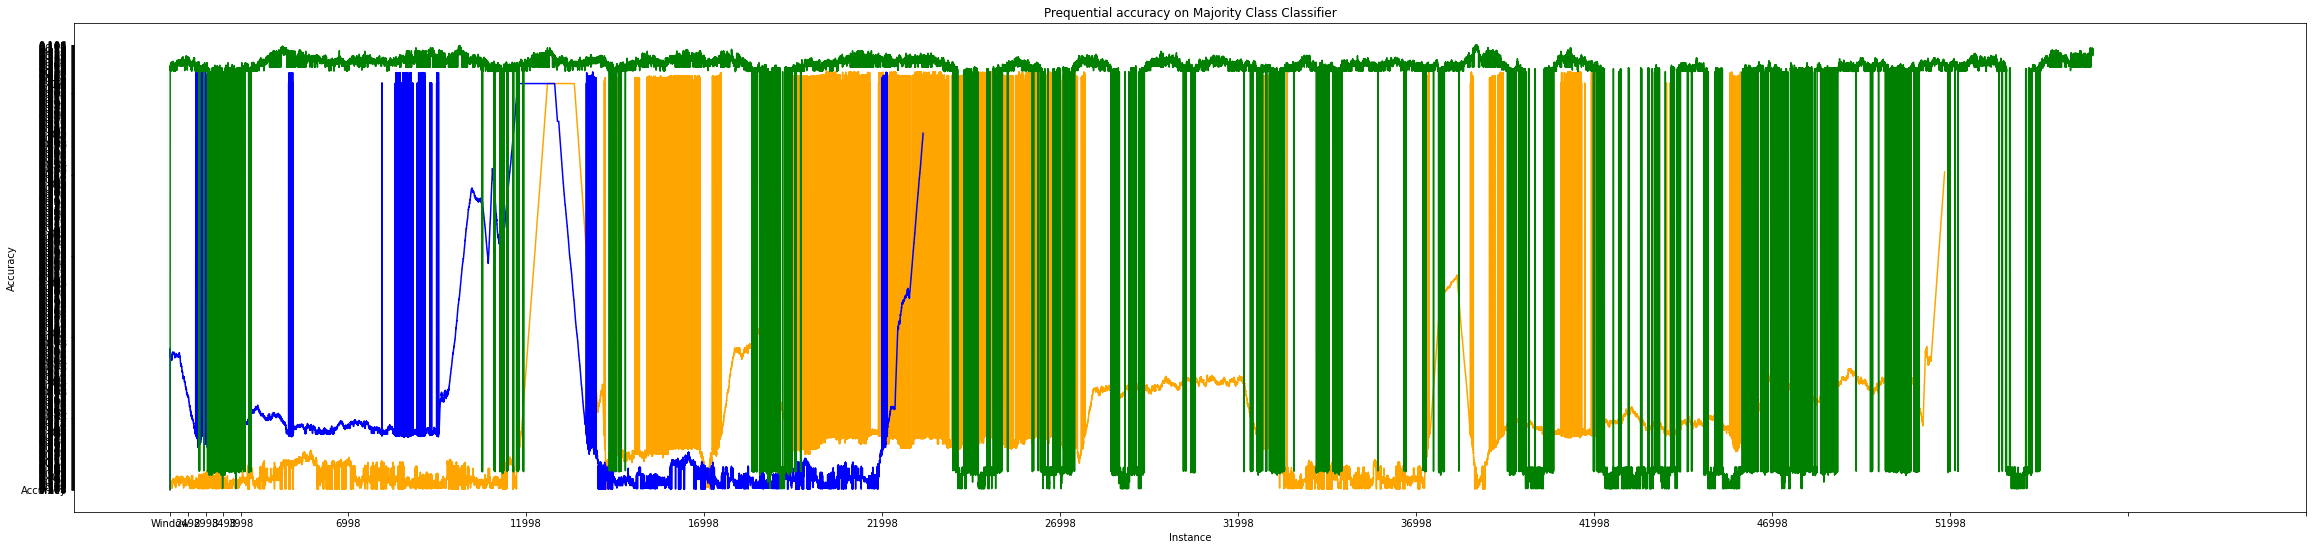

In [43]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as mpl
import numpy as np
from matplotlib import pyplot as plt
fig, ax = mpl.subplots(figsize=(40, 9))

x = []
y = []

# create dataframe

with open(r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//abrupt_majClass_accuracies.csv",'r') as csvfile:
      lines = csv.reader(csvfile, delimiter=',')
      for row in lines:
            x.append(row[0])
            y.append((row[1]))

x1 = []
y1 = []

# create dataframe

with open(r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//gradual_majClass_accuracies.csv",'r') as csvfile:
      lines = csv.reader(csvfile, delimiter=',')
      for row in lines:
            x1.append(row[0])
            y1.append((row[1]))

x2 = []
y2 = []

# create dataframe

with open(r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//incremental_majClass_accuracies.csv",'r') as csvfile:
      lines = csv.reader(csvfile, delimiter=',')
      for row in lines:
            x2.append(row[0])
            y2.append((row[1]))


plt.plot(x, y, color = 'orange' , label='Abrupt - Majority class Classifier')
plt.plot(x1, y1, color = 'blue' , label='Gradual - Majority class Classifier')
plt.plot(x2, y2, color = 'green' , label='Incremental - Majority class Classifier')

# Giving title to the chart using plt.title
plt.title('Prequential accuracy on Majority Class Classifier')

# rotating the x-axis tick labels at 30degree
# towards right
#plt.xticks(rotation=30, ha='right')
#plt.xlim([0, 6000])
#plt.yticks([0, 100 , 200 , 300, 400 , 500 , 600 , 700, 800, 900 , 1000])    # changing x scale by own
plt.xticks([0, 500 , 1000, 1500, 2000,5000, 10000, 15000,20000,25000,30000,35000,40000,45000,50000,55000,60000])    # changing x scale by own

# Providing x and y label to the chart
plt.xlabel('Instance')
plt.ylabel('Accuracy')


No Change Classifier

In [65]:
def noChangeClassfier(df):
    accuracy_list = [] 
    windowSize = 1000
    prevclass = 1
    count = 0
    # Baseline train 1000
    data = df.iloc[0 : windowSize]
    for datapoint in data['class']: 
      if datapoint == prevclass:
          count += 1
      prevclass = datapoint
    accuracy_list.append([windowSize, count/1000])    # 1000  / get baslin majority class / get accuracy for 1000  
    

    # test 
    dataset_1 = df.iloc[windowSize : windowSize + 1000]     
    count=0 
    for datapoint in dataset_1['class']: 
      if datapoint == prevclass:
          count += 1
      prevclass = datapoint

    windowSize += 1000
    accuracy_list.append([windowSize, count/1000])    # 1000  / get baslin majority class / get accuracy for 1000       

    # Base model and Train set ready with majority class     # Now give the sliding window and predict and calculate accuracy        
    frameSize = len(df)
    dataSeq = df.iloc[ windowSize : frameSize ]  
    Size = 1000 
    count=0 

    for i in range(len(dataSeq) -  Size + 1):  
        count= 0         
        dataset = dataSeq[ i : i +  Size]             
        windowSize += 1 
        for datapoint in dataset['class']:      
          if datapoint == prevclass:
            count += 1
        prevclass = datapoint
        accuracy_list.append([windowSize, count/1000])    # 1000  / get baslin majority class / get accuracy for 1000  
    print(accuracy_list)
    return accuracy_list

In [66]:
accuracy_Noclass_list_abrupt = noChangeClassfier(df_abrupt)
accuracy_Noclass_list_abrupt

accuracy_Noclass_list_gradual = noChangeClassfier(df_gradual)
accuracy_Noclass_list_gradual

accuracy_Noclass_list_incremental = noChangeClassfier(df_incremental)
accuracy_Noclass_list_incremental

[[1000, 0.158], [2000, 0.166], [2001, 0.205], [2002, 0.184], [2003, 0.205], [2004, 0.186], [2005, 0.187], [2006, 0.187], [2007, 0.179], [2008, 0.188], [2009, 0.189], [2010, 0.189], [2011, 0.195], [2012, 0.181], [2013, 0.18], [2014, 0.19], [2015, 0.196], [2016, 0.191], [2017, 0.048], [2018, 0.197], [2019, 0.201], [2020, 0.198], [2021, 0.049], [2022, 0.201], [2023, 0.198], [2024, 0.05], [2025, 0.202], [2026, 0.199], [2027, 0.199], [2028, 0.178], [2029, 0.179], [2030, 0.18], [2031, 0.18], [2032, 0.187], [2033, 0.182], [2034, 0.182], [2035, 0.202], [2036, 0.196], [2037, 0.203], [2038, 0.202], [2039, 0.188], [2040, 0.197], [2041, 0.189], [2042, 0.185], [2043, 0.189], [2044, 0.049], [2045, 0.182], [2046, 0.189], [2047, 0.182], [2048, 0.2], [2049, 0.183], [2050, 0.19], [2051, 0.2], [2052, 0.194], [2053, 0.185], [2054, 0.201], [2055, 0.201], [2056, 0.19], [2057, 0.201], [2058, 0.05], [2059, 0.183], [2060, 0.192], [2061, 0.193], [2062, 0.193], [2063, 0.201], [2064, 0.183], [2065, 0.194], [2066,

[[1000, 0.149],
 [2000, 0.153],
 [2001, 0.166],
 [2002, 0.167],
 [2003, 0.164],
 [2004, 0.166],
 [2005, 0.168],
 [2006, 0.167],
 [2007, 0.167],
 [2008, 0.165],
 [2009, 0.167],
 [2010, 0.168],
 [2011, 0.169],
 [2012, 0.169],
 [2013, 0.165],
 [2014, 0.168],
 [2015, 0.171],
 [2016, 0.168],
 [2017, 0.171],
 [2018, 0.171],
 [2019, 0.168],
 [2020, 0.16],
 [2021, 0.171],
 [2022, 0.161],
 [2023, 0.164],
 [2024, 0.161],
 [2025, 0.172],
 [2026, 0.162],
 [2027, 0.167],
 [2028, 0.171],
 [2029, 0.171],
 [2030, 0.164],
 [2031, 0.167],
 [2032, 0.168],
 [2033, 0.168],
 [2034, 0.162],
 [2035, 0.169],
 [2036, 0.166],
 [2037, 0.163],
 [2038, 0.171],
 [2039, 0.169],
 [2040, 0.163],
 [2041, 0.164],
 [2042, 0.163],
 [2043, 0.166],
 [2044, 0.164],
 [2045, 0.163],
 [2046, 0.164],
 [2047, 0.163],
 [2048, 0.165],
 [2049, 0.167],
 [2050, 0.169],
 [2051, 0.164],
 [2052, 0.17],
 [2053, 0.17],
 [2054, 0.165],
 [2055, 0.164],
 [2056, 0.169],
 [2057, 0.168],
 [2058, 0.17],
 [2059, 0.168],
 [2060, 0.167],
 [2061, 0.16

In [67]:
import csv
# field names 
fields = ['Window', 'Accuracy'] 

with open('//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//abrupt_noClass_accuracies.csv' , 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(accuracy_Noclass_list_abrupt)

with open('//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//gradual_noClass_accuracies.csv' , 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(accuracy_Noclass_list_gradual)

with open('//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//incremental_noClass_accuracies.csv' , 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(accuracy_Noclass_list_incremental)

Text(0, 0.5, 'Accuracy')

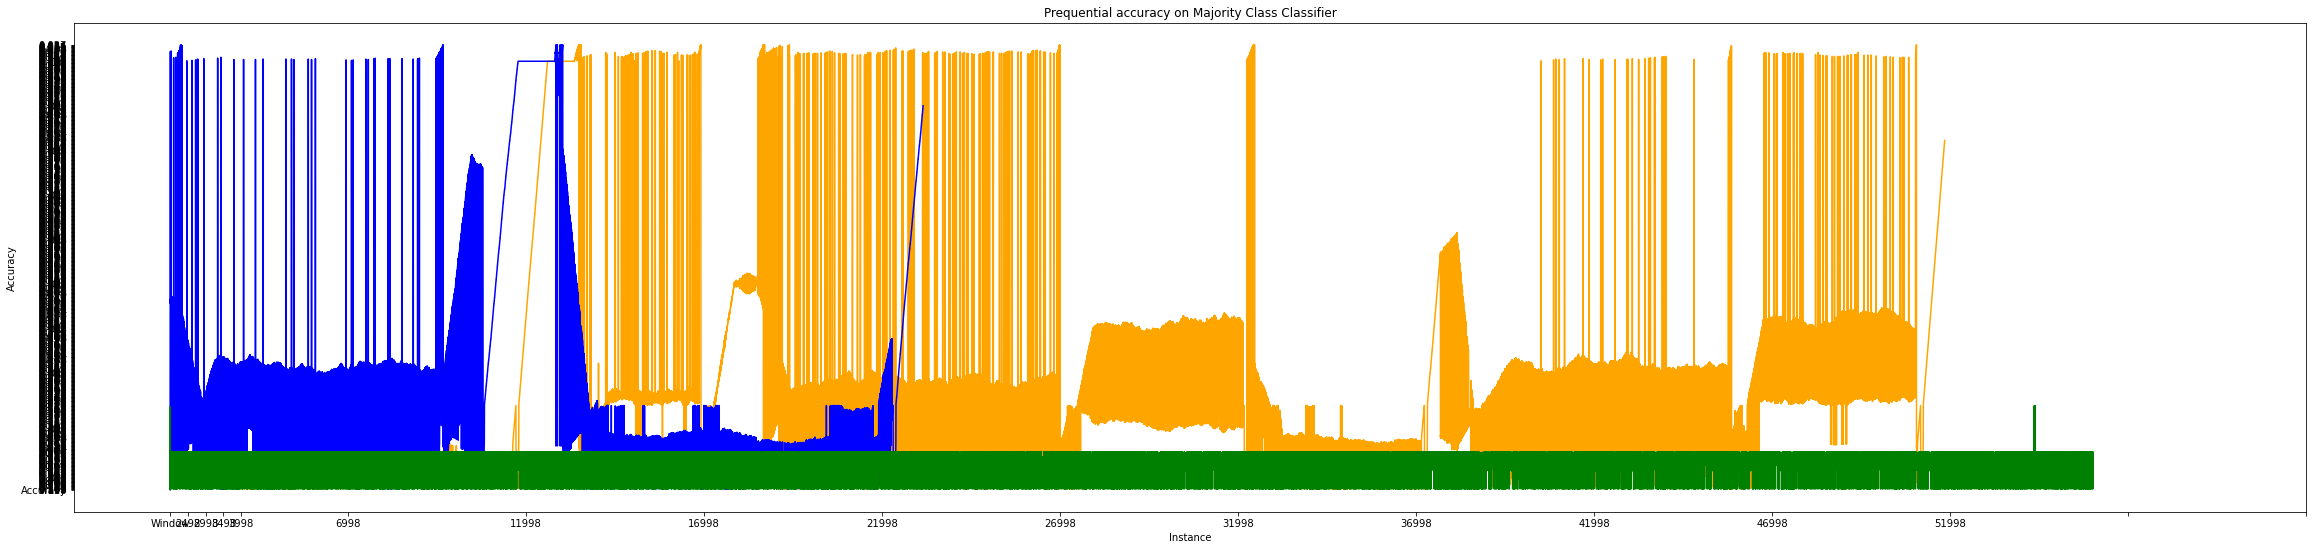

In [68]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as mpl
import numpy as np
from matplotlib import pyplot as plt
fig, ax = mpl.subplots(figsize=(40, 9))

x = []
y = []

# create dataframe

with open(r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//abrupt_noClass_accuracies.csv",'r') as csvfile:
      lines = csv.reader(csvfile, delimiter=',')
      for row in lines:
            x.append(row[0])
            y.append((row[1]))

x1 = []
y1 = []

# create dataframe

with open(r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//gradual_noClass_accuracies.csv",'r') as csvfile:
      lines = csv.reader(csvfile, delimiter=',')
      for row in lines:
            x1.append(row[0])
            y1.append((row[1]))

x2 = []
y2 = []

# create dataframe

with open(r"//content//drive//MyDrive//Colab Notebooks//ML_Assignment4//incremental_noClass_accuracies.csv",'r') as csvfile:
      lines = csv.reader(csvfile, delimiter=',')
      for row in lines:
            x2.append(row[0])
            y2.append((row[1]))


plt.plot(x, y, color = 'orange' , label='Abrupt - Majority class Classifier')
plt.plot(x1, y1, color = 'blue' , label='Gradual - Majority class Classifier')
plt.plot(x2, y2, color = 'green' , label='Incremental - Majority class Classifier')

# Giving title to the chart using plt.title
plt.title('Prequential accuracy on Majority Class Classifier')

# rotating the x-axis tick labels at 30degree
# towards right
#plt.xticks(rotation=30, ha='right')
#plt.xlim([0, 6000])
#plt.yticks([0, 100 , 200 , 300, 400 , 500 , 600 , 700, 800, 900 , 1000])    # changing x scale by own
plt.xticks([0, 500 , 1000, 1500, 2000,5000, 10000, 15000,20000,25000,30000,35000,40000,45000,50000,55000,60000])    # changing x scale by own

# Providing x and y label to the chart
plt.xlabel('Instance')
plt.ylabel('Accuracy')